***BDIA2***<br>
***Machine Learning 1***<br>
***Lab : 2***<br>
***Exercice: 3***<br>
***Dataset: Credit Risk prediction***<br>
----------------------------------------------------

In [3]:
# lire data frame
train_data = pd.read_excel('train.xlsx')
train_data.head()

,X1_sectoreconómico,X2_entidadotorgante,X3_MontoCoberturado,X4_departamento,Y_nivelderiesgo
0,0.461538,0.111111,0.053854,0.608696,1.0
1,0.153846,0.000000,0.011885,0.608696,1.0
2,0.692308,0.000000,0.011604,0.913043,1.0
3,0.538462,0.000000,0.010108,0.608696,1.0
4,0.538462,0.000000,0.015905,0.608696,1.0


In [3]:
# nbr de ligne et colonne 
train_data.shape

(350909, 5)

In [4]:
# les valeur manquantes
train_data.isnull().sum()

X1_sectoreconómico     0
X2_entidadotorgante    0
X3_MontoCoberturado    0
X4_departamento        0
Y_nivelderiesgo        0
dtype: int64

In [4]:
# division de data pour les x et y => pour les train
x_train = train_data.iloc[:4000,:-1]
y_train = train_data.iloc[:4000,-1]
x_train.shape,y_train.shape

((4000, 4), (4000,))

In [12]:
correlation_matrix = train_data.corr().round(2)

<AxesSubplot:>

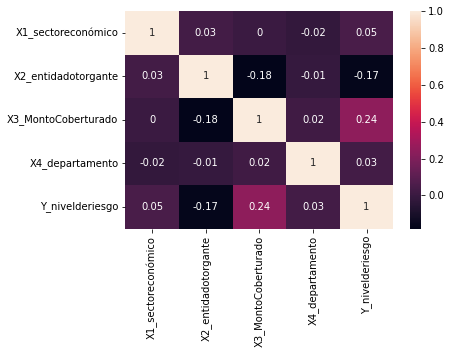

In [11]:
sns.heatmap(correlation_matrix, annot=True)

#### TEST SET:

In [5]:
# lire data frame de test
testdata = pd.read_excel('test.xlsx')
# testdata.head()

In [6]:
# division de data pour les x et y => pour les test
x_test = testdata.iloc[:1000,:-1]
y_test = testdata.iloc[:1000,-1]
x_test.shape,y_test.shape

((1000, 4), (1000,))

<h3 style='text-align:center;'>Multiple Regression

In [15]:
#modéle de régresson linéaire multiple
linaire_model= LinearRegression()

In [16]:
linaire_model.fit(x_train,y_train)

LinearRegression()

In [22]:
# prédiction de train
y_train_pred = linaire_model.predict(x_train)
y_train_pred[:5]

array([0.61011078, 0.55859541, 0.6004604 , 0.57936303, 0.58690808])

In [23]:
# prédiction de test
y_test_pred = linaire_model.predict(x_test)
y_test_pred[:5]

array([0.57936303, 0.56910167, 0.59318716, 0.57640409, 0.66749257])

### Evaluation du modèle:

<li>sur la partie Train :

In [51]:
# Evaluation de train 
mul_tr_mse = mean_squared_error(y_train,y_train_pred)
mul_tr_r2 = r2_score(y_train, y_train_pred)
print(f"Model: Multiple Regression\nData set: Train\nMSE: {mul_tr_mse}\nR2 score: {mul_tr_r2}")

Model: Multiple Regression
Data set: Train
MSE: 0.1278010855966745
R2 score: 0.08010859711981155


<li>sur la partie Test :

In [52]:
 # Evaluation de test
mul_ts_mse = mean_squared_error(y_test,y_test_pred)
mul_ts_r2 = r2_score(y_test, y_test_pred)
print(f"Model: Multiple Regression\nData set: Test\nMSE: {mul_ts_mse}\nR2 score: {mul_ts_r2}")

Model: Multiple Regression
Data set: Test
MSE: 0.12771166041199397
R2 score: 0.07973270911684349


<h3 style='text-align:center;;'>Polynomial Regression

<li><b>Représentation polynomiale des données du Train:

In [9]:
r2_tr,error_tr = [],[]
r2_ts,error_ts = [],[]
for i in range(1,10):
    poly = PolynomialFeatures(degree=i)
    x_tr = poly.fit_transform(x_train)
    x_ts = poly.fit_transform(x_test)
    lr = LinearRegression()
    lr.fit(x_tr,y_train)
    pred_tr = lr.predict(x_tr)
    r2_tr.append(r2_score(y_train,pred_tr).round(3))
    error_tr.append(mean_squared_error(y_train,pred_tr).round(3))
    pred_ts = lr.predict(x_ts)
    r2_ts.append(r2_score(y_test,pred_ts).round(3))
    error_ts.append(mean_squared_error(y_test,pred_ts).round(3))

In [ ]:
best_degree = np.argmin()

In [10]:
df = pd.DataFrame({'degree':range(1,10),'Train R2':r2_tr,'Train MSE':error_tr,'Test R2':r2_ts,'Test MSE':error_ts})
df.head(10)

,degree,Train R2,Train MSE,Test R2,Test MSE
0,1,0.158,0.126,1.920000e-01,1.210000e-01
1,2,0.473,0.079,4.850000e-01,7.700000e-02
2,3,0.555,0.066,5.930000e-01,6.100000e-02
3,4,0.614,0.058,6.180000e-01,5.700000e-02
4,5,0.696,0.045,3.010000e-01,1.050000e-01
5,6,0.768,0.035,-6.569000e+00,1.135000e+00
6,7,0.847,0.023,-6.019270e+02,9.044200e+01
7,8,0.903,0.015,-1.873266e+06,2.809982e+05
8,9,0.934,0.010,-2.987228e+08,4.480972e+07


In [7]:
# x_poly = x_train

train_poly_features= PolynomialFeatures(degree=5)
poly_tr_x = train_poly_features.fit_transform(x_train)
poly_tr_x.shape

(4000, 126)

In [7]:
train_poly_features.get_feature_names_out()

array(['1', 'X1_sectoreconómico', 'X2_entidadotorgante',
       'X3_MontoCoberturado', 'X4_departamento', 'X1_sectoreconómico^2',
       'X1_sectoreconómico X2_entidadotorgante',
       'X1_sectoreconómico X3_MontoCoberturado',
       'X1_sectoreconómico X4_departamento', 'X2_entidadotorgante^2',
       'X2_entidadotorgante X3_MontoCoberturado',
       'X2_entidadotorgante X4_departamento', 'X3_MontoCoberturado^2',
       'X3_MontoCoberturado X4_departamento', 'X4_departamento^2',
       'X1_sectoreconómico^3', 'X1_sectoreconómico^2 X2_entidadotorgante',
       'X1_sectoreconómico^2 X3_MontoCoberturado',
       'X1_sectoreconómico^2 X4_departamento',
       'X1_sectoreconómico X2_entidadotorgante^2',
       'X1_sectoreconómico X2_entidadotorgante X3_MontoCoberturado',
       'X1_sectoreconómico X2_entidadotorgante X4_departamento',
       'X1_sectoreconómico X3_MontoCoberturado^2',
       'X1_sectoreconómico X3_MontoCoberturado X4_departamento',
       'X1_sectoreconómico X4_departamen

In [8]:
test_poly_features= PolynomialFeatures(degree=5)
poly_ts_x = test_poly_features.fit_transform(x_test)
poly_ts_x.shape

(1000, 126)

In [59]:
test_poly_features.get_feature_names_out()

array(['1', 'X1_sectoreconómico', 'X2_entidadotorgante',
       'X3_MontoCoberturado', 'X4_departamento', 'X1_sectoreconómico^2',
       'X1_sectoreconómico X2_entidadotorgante',
       'X1_sectoreconómico X3_MontoCoberturado',
       'X1_sectoreconómico X4_departamento', 'X2_entidadotorgante^2',
       'X2_entidadotorgante X3_MontoCoberturado',
       'X2_entidadotorgante X4_departamento', 'X3_MontoCoberturado^2',
       'X3_MontoCoberturado X4_departamento', 'X4_departamento^2',
       'X1_sectoreconómico^3', 'X1_sectoreconómico^2 X2_entidadotorgante',
       'X1_sectoreconómico^2 X3_MontoCoberturado',
       'X1_sectoreconómico^2 X4_departamento',
       'X1_sectoreconómico X2_entidadotorgante^2',
       'X1_sectoreconómico X2_entidadotorgante X3_MontoCoberturado',
       'X1_sectoreconómico X2_entidadotorgante X4_departamento',
       'X1_sectoreconómico X3_MontoCoberturado^2',
       'X1_sectoreconómico X3_MontoCoberturado X4_departamento',
       'X1_sectoreconómico X4_departamen

In [8]:
poly_model = LinearRegression()
poly_model.fit(poly_tr_x, y_train)

LinearRegression()

<li><b>Prédiction et évaluation sur la partie Train:

In [16]:
# prédiction train
poly_tr_pred = poly_model.predict(poly_tr_x)
poly_tr_pred[:5]

array([1.02984709, 0.89698648, 0.69284487, 0.87286696, 0.9264099 ])

In [17]:
# Evaluation train
poly_tr_mse = mean_squared_error(y_train,poly_tr_pred)
poly_tr_r2 = r2_score(y_train,poly_tr_pred)
print(f"Model: Polynomial Regression\nData set: Train\nMSE: {poly_tr_mse}\nR2 score: {poly_tr_r2}")

Model: Polynomial Regression
Data set: Train
MSE: 0.045406966901250706
R2 score: 0.6960818942465309


<li><b>Prédiction et évaluation sur la partie Test:

In [18]:
# prédiction test
poly_ts_pred = poly_model.predict(poly_ts_x)
poly_ts_pred[:5]

array([0.87286696, 0.95677027, 0.85437714, 1.00325893, 1.27667119])

In [19]:
# Evaluation train
poly_ts_mse = mean_squared_error(y_test,poly_ts_pred)
poly_ts_r2 = r2_score(y_test,poly_ts_pred)
print(f"Model: Polynomial Regression\nData set: Test\nMSE: {poly_ts_mse}\nR2 score: {poly_ts_r2}")

Model: Polynomial Regression
Data set: Test
MSE: 0.10480525809955957
R2 score: 0.30131846346954727


<h3 style='text-align:center;'>Ridge Regression

In [64]:
ridge_model = Ridge(alpha=10)
ridge_model.fit(x_train,y_train)

Ridge(alpha=10)

In [65]:
ridge_ts_pred = ridge_model.predict(x_test)
ridge_ts_pred[:5]

array([0.57949967, 0.56914454, 0.59332342, 0.57632518, 0.66667848])

In [67]:
#Evaluation
ridge_mse = mean_squared_error(y_test,ridge_ts_pred)
ridge_r2 = r2_score(y_test,ridge_ts_pred)
print(f"Model: Ridge Regression\nData set: Test\nMSE: {ridge_mse}\nR2 score: {ridge_r2}")

Model: Ridge Regression
Data set: Test
MSE: 0.1277142579540242
R2 score: 0.07971399169543181


<h3 style='text-align:center;'>Lasso Regression

In [68]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)

Lasso(alpha=0.1)

In [70]:
lasso_ts_pred = lasso_model.predict(x_test)
lasso_ts_pred[:5]

array([0.50233346, 0.50233346, 0.50233346, 0.50233346, 0.50233346])

In [73]:
#Evaluation du modèle
lasso_mse = mean_squared_error(y_test,lasso_ts_pred)
lasso_r2 = r2_score(y_test,lasso_ts_pred)
print(f"Model: Lasso Regression\nData set: Test\nMSE: {lasso_mse}\nR2 score: {lasso_r2}")

Model: Lasso Regression
Data set: Test
MSE: 0.1387768979975501
R2 score: -1.405865204917589e-06


<h3 style='text-align:center;'>Elastic Net Regression

In [74]:
elastic_model = ElasticNet(alpha=0.01)
elastic_model.fit(x_train,y_train)

ElasticNet(alpha=0.01)

In [75]:
elastic_ts_pred = elastic_model.predict(x_test)
elastic_ts_pred[:5]

array([0.55905832, 0.55549582, 0.561346  , 0.55429426, 0.55697281])

In [78]:
# Evaluation du modèle:
elastic_mse = mean_squared_error(y_test,elastic_ts_pred)
elastic_r2 = r2_score(y_test,elastic_ts_pred)
print(f"Model: Elastic Net Reggression\nData set: Test\nMSE: {elastic_mse}\nR2 score: {elastic_r2}")

Model: Elastic Net Reggression
Data set: Test
MSE: 0.13481810873042852
R2 score: 0.028524918687139467


<h3>Comparison between different models:

In [20]:
models = [LinearRegression(),Ridge(alpha=1),Lasso(alpha=1),ElasticNet(alpha=1)]
tr_mse, ts_mse = [],[]
tr_r2, ts_r2 = [],[]
for m in models:
    m.fit(poly_tr_x,y_train)
    # ----- Train ------
    tr_pr = m.predict(poly_tr_x)
    tr_mse.append(mean_squared_error(y_train,tr_pr))
    tr_r2.append(r2_score(y_train,tr_pr))
    # ----- Test ------
    ts_pr = m.predict(poly_ts_x)
    ts_mse.append(mean_squared_error(y_test,ts_pr))
    ts_r2.append(r2_score(y_test,ts_pr))

In [21]:
mods = pd.DataFrame({'model':models,'Train R2':tr_r2,'Train MSE':tr_mse,'Test R2':ts_r2,'Test MSE':ts_mse})
mods.head()

,model,Train R2,Train MSE,Test R2,Test MSE
0,LinearRegression(),0.696082,0.045407,0.301318,0.104805
1,Ridge(alpha=1),0.508251,0.073470,0.550851,0.067374
2,Lasso(alpha=1),0.000000,0.149405,-0.025695,0.153859
3,ElasticNet(alpha=1),0.000000,0.149405,-0.025695,0.153859


<h3>Optimisation de la performance du modèle de ML:

In [5]:
from sklearn.linear_model import RidgeCV,LassoCV,ElasticNetCV

In [16]:
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(poly_tr_x,y_train)

C:\Program Files\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.23230016601235093, tolerance: 0.04684305555555549
  model = cd_fast.enet_coordinate_descent_gram(
C:\Program Files\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4870280590348557, tolerance: 0.04684305555555549
  model = cd_fast.enet_coordinate_descent_gram(
C:\Program Files\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6702277386785909, tolerance: 0.04684305555555549
  model = cd_fast.enet_coordinate_descent_gram(
C:\Program Files\Python\Python310\lib\site-packages\sklea

LassoCV(cv=5)

In [17]:
print('Optimal alpha: ',lasso_cv.alpha_)
# len(lasso_cv.alphas_)

Optimal alpha:  3.4727832561728355e-05


In [19]:
# print('Coefficients: ',lasso_cv.coef_)
len(lasso_cv.coef_)

126

In [20]:
lcv_ts_pred = lasso_cv.predict(poly_ts_x)
lcv_ts_pred[:5]

array([0.93184096, 0.95396883, 0.94869032, 1.01518491, 1.1030525 ])

In [21]:
# Evaluation du modèle:
lcv_mse = mean_squared_error(y_test,lcv_ts_pred)
lcv_r2 = r2_score(y_test,lcv_ts_pred)
print(f"Model: LassoCV Regression\nData set: Test\nMSE: {lcv_mse}\nR2 score: {lcv_r2}")

Model: LassoCV Regression
Data set: Test
MSE: 0.06064451885915264
R2 score: 0.5957148869533594


In [22]:
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(poly_tr_x,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5)

In [23]:
ridge_cv.alpha_

0.1

In [31]:
ridge_cv.alphas

array([ 0.1,  1. , 10. ])

In [25]:
len(ridge_cv.coef_)

126

Prediction on Train data:

In [26]:
rcv_tr_pred = ridge_cv.predict(poly_tr_x)
rcv_tr_pred[:5]

array([0.82185466, 0.93024036, 0.86625859, 0.92831123, 0.94408833])

In [27]:
# Evaluation du modèle:
rcv_tr_mse = mean_squared_error(y_train,rcv_tr_pred)
rcv_tr_r2 = r2_score(y_train,rcv_tr_pred)
print(f"Model: RidgeCV Regression\nData set: Train\nMSE: {rcv_tr_mse}\nR2 score: {rcv_tr_r2}")

Model: RidgeCV Regression
Data set: Train
MSE: 0.06725126351853727
R2 score: 0.5498735543703921


Prediction on Test data:

In [28]:
rcv_ts_pred = ridge_cv.predict(poly_ts_x)
rcv_ts_pred[:5]

array([0.92831123, 0.94970928, 0.94181734, 1.01244203, 1.0533024 ])

In [29]:
# Evaluation du modèle:
rcv_mse = mean_squared_error(y_test,rcv_ts_pred)
rcv_r2 = r2_score(y_test,rcv_ts_pred)
print(f"Model: RidgeCV Regression\nData set: Test\nMSE: {rcv_mse}\nR2 score: {rcv_r2}")

Model: RidgeCV Regression
Data set: Test
MSE: 0.06108846097963734
R2 score: 0.5927553583142887


In [30]:
ecv = ElasticNetCV(cv=5)
ecv.fit(poly_tr_x,y_train)

C:\Program Files\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.057660335596381174, tolerance: 0.04684305555555549
  model = cd_fast.enet_coordinate_descent_gram(
C:\Program Files\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.07481588988804333, tolerance: 0.04684305555555549
  model = cd_fast.enet_coordinate_descent_gram(
C:\Program Files\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.09943072677802434, tolerance: 0.04684305555555549
  model = cd_fast.enet_coordinate_descent_gram(
C:\Program Files\Python\Python310\lib\site-packages\sk

ElasticNetCV(cv=5)

In [40]:
ecv.alpha_

6.945566512345671e-05

In [31]:
ecv_pred = ecv.predict(poly_tr_x)

In [35]:
# Evaluation du modèle:
ecv_tr_mse = mean_squared_error(y_train,ecv_pred)
ecv_tr_r2 = r2_score(y_train,ecv_pred)
print(f"Model: ElasticNetCV Regression\nData set Train\nMSE: {ecv_tr_mse}\nR2 score: {ecv_tr_r2}")

Model: ElasticNetCV Regression
Data set Train
MSE: 0.0693793366265817
R2 score: 0.5356299263097839


In [33]:
ecv_ts_pred = ecv.predict(poly_ts_x)

In [39]:
# Evaluation du modèle:
ecv_ts_mse = mean_squared_error(y_test,ecv_ts_pred)
ecv_ts_r2 = r2_score(y_test,ecv_ts_pred)
print(f"Model: ElasticNetCV Regression\nData set: Test\nMSE: {ecv_ts_mse}\nR2 score: {ecv_ts_r2}")

Model: ElasticNetCV Regression
Data set: Test
MSE: 0.06265274957719166
R2 score: 0.5823270689256201


In [14]:
from sklearn.model_selection import validation_curve
params = np.arange(20,step=.1)
tr_sc,val_sc = validation_curve(Ridge(),X=poly_tr_x,y=y_train,param_name='alpha',param_range=params,cv=5)

Text(0, 0.5, 'score')

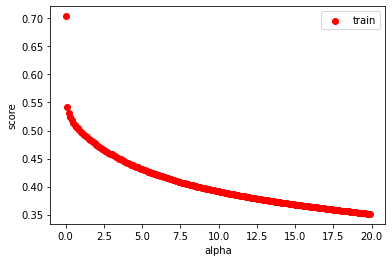

In [11]:
import matplotlib.pyplot as plt
plt.scatter(params,tr_sc.mean(axis=1),c='red',label='train')
# plt.plot(params,val_sc.mean(axis=1),c='green',label='validation')
plt.legend()
plt.xlabel('alpha');plt.ylabel('score')

In [28]:
grid = GridSearchCV(Ridge(),{'alpha':params})

In [15]:
params[tr_sc.argmax()]

0.2

In [29]:
grid.fit(poly_tr_x,y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,...
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3,
       15.4, 15.5, 15.6, 15.7, 15.8, 15.9, 16. , 16.1, 16.2, 16.3, 16.4,
       16.5, 16.6, 16.7, 16.8, 16.9, 17. , 17.1, 17.2, 17.3, 17.4, 17.5,
       17.6, 17.7, 17.8, 17.9, 18. , 18.1, 18.2, 18.3, 18.4, 18.5, 

In [31]:
grid.best_score_

0.20742325658001745